<a href="https://colab.research.google.com/github/BakedBel/CodigosTesis/blob/main/undergrad_thesis_code_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import t
import sympy as sym
from sklearn.metrics import r2_score
from scipy.special import erf
from scipy.ndimage import zoom
plt.rcParams['font.family']='serif'

# The intensity image

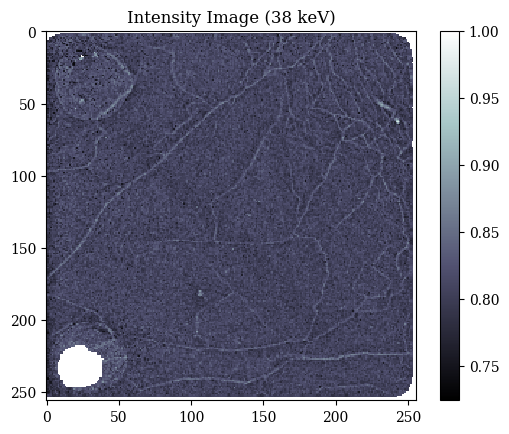

<Figure size 640x480 with 0 Axes>

In [ ]:
#proj = np.rot90(np.genfromtxt('RAW.txt'),1)  #Image rotation if needed
#proj = np.load('proj.npy')
Sample = np.genfromtxt("PP-Inline-CIRS015-Reg4.txt") #Raw image
#FF = np.genfromtxt("C:\\Users\\ALEJANDRO\\Documents\\APM 2025\\TESIS\GEANT4 CODE\\IMAGENES SIMULADAS\\TEST 2\\test2_FF.txt") #Flat Field Correction

A = np.genfromtxt("Inline28RhThi.txt")

Corr = Sample


# Look at the data. You can see the edge-enhanced borders at the transition
# from Teflon to air. In addition, the absorbing properties of the Teflon plate
# are visible. Note that the background-values are around 1.

plt.figure()
plt.title('Intensity Image (38 keV)')
plt.imshow(Corr, cmap='bone', interpolation='none')
plt.colorbar()

# Also plot a line profile through the middle row.

def PI(name):
    P=np.zeros(256)

    for i in range(len(name)):
        P=P+name[i,:]
    mean=P/len(name)
    return mean

plt.figure()

#plt.plot(proj[proj.shape[0]//2][:])

# The parameters of the setup that influence the image formation process are
# specified below.

pixel_size = 55e-6
distance = 1.2

# As Paganin assumes a single material which has to be know beforehand, we look
# up the absorption index and the decrement of the real part of the complex
# refractive index in some database for the given energy. I do that for you.

mu = 0.64671 * 100
delta = 7.1249E-07

mu_1 = 0.75161 * 100
delta_1 = 7.325E-07

E = 19

#E = 4
#mu = 295.
#delta = 3.91e-9
gamma = 295.
E_J=E*1.6*(10**(-16))
h=10**(-34)
c=3*(10**(8))
k=E_J/(h*c)


# Intensity Profile Image

Text(0, 0.5, 'Phase Counts')

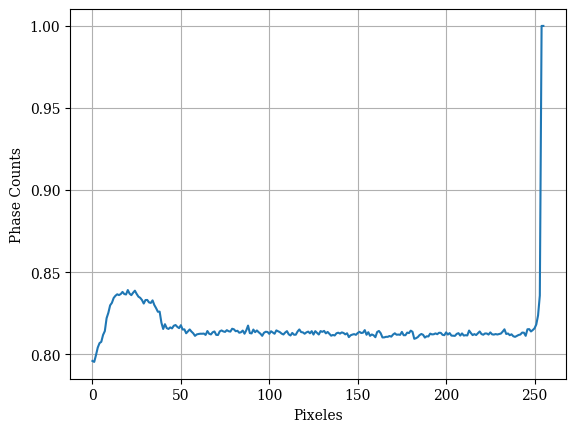

In [ ]:
mean = PI(Corr)
plt.plot(mean)
plt.grid()
plt.xlabel("Pixeles")
plt.ylabel("Phase Counts")

In [ ]:
for i in range(80, 201):
    for j in range(1, 251):
        if Corr[i, j] == 0:
            Corr[i, j] = (Corr[i, j + 1] + Corr[i, j - 1] + Corr[i + 1, j] + Corr[i - 1, j]) / 4
            dead = dead + 1
        else:
            pass


# Variable Definition for Phase Retrieval Methods

In [ ]:
# I help you with creating the frequencies that correspond to the different
# parts of the Fourier image according to our convention.

v = 2. * np.pi * np.fft.fftfreq(Corr.shape[0], d=pixel_size)
u = 2. * np.pi * np.fft.fftfreq(Corr.shape[1], d=pixel_size)
ky, kx = np.meshgrid(v, u, indexing='ij')

# Build the Paganin kernel. Its representation was discussed in the lecture.
w = pixel_size

In [ ]:
PaganinD = (1/(distance*(delta_1/mu_1)*(kx**2 + ky**2) + 1))
#scale_factor = PaganinD.shape[0] / A.shape[0]  # 512 / 256 = 2

# Realizamos el zoom para ajustar A al tamaño de PaganinD
#A_resized = zoom(A, scale_factor)

# The Paganin Method for A (PM)

array([[3817.98853869, 3846.10650629, 3886.5314171 , ..., 3906.81030618,
        3879.19892541, 3847.16050737],
       [3863.64547028, 3905.18373257, 3933.35214216, ..., 3955.91013229,
        3921.40990964, 3895.49033776],
       [3899.13952992, 3938.00029997, 3982.97281305, ..., 3986.83594155,
        3973.72412191, 3939.96674429],
       ...,
       [3895.01529329, 3937.54800412, 4002.88419395, ..., 4009.50509875,
        3989.56867829, 3949.07936103],
       [3870.12292068, 3913.27658143, 3960.85745403, ..., 3987.29654149,
        3966.36464899, 3924.95658862],
       [3839.48624767, 3875.94094821, 3923.79126596, ..., 3946.07753006,
        3915.08570339, 3881.06968584]])

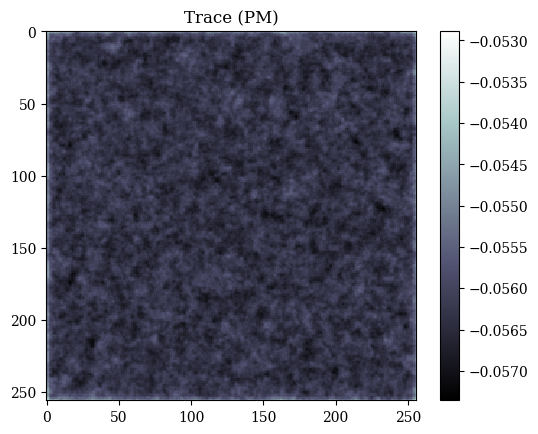

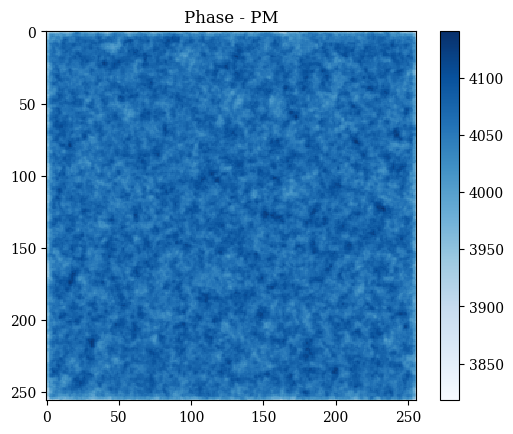

In [ ]:
 #Paganin discreto
traceDA = np.multiply(np.divide(-1, mu_1), np.log(np.fft.ifft2(np.multiply(PaganinD, np.fft.fft2(A)))))
plt.figure()
plt.title('Trace (PM)')
plt.imshow(np.real(traceDA), cmap='bone', interpolation='none')
plt.colorbar()

Phase3A = -k*delta*traceDA#Discreto
plt.figure()
plt.title('Phase - PM')
plt.imshow(np.real(Phase3A), cmap='Blues', interpolation='none')
plt.colorbar()
np.real(Phase3A)

#np.savetxt("C:\\Users\\ALEJANDRO\\Documents\\APM 2025\\TESIS\\PYTHON CODE\\TESTING CODES\\TEST 1\\paganin_trace_PaganinBeltran.txt", np.real(traceDA), fmt="%.5f")

# The Paganin-Beltran Method (PBM)

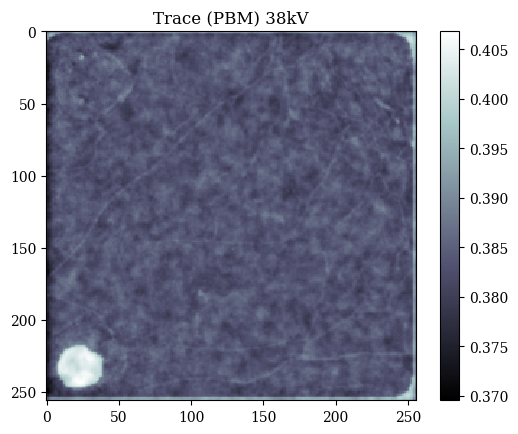

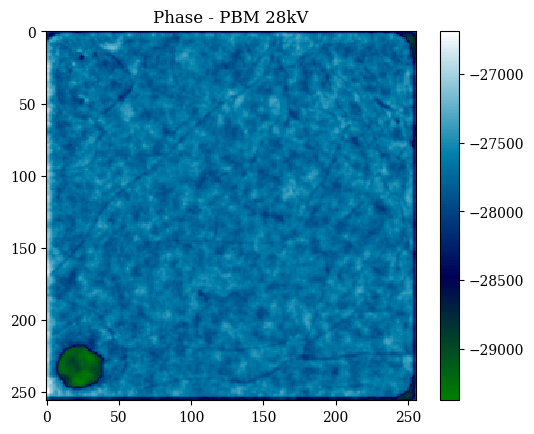

In [ ]:
PaganinBeltran = (1/(distance*((delta-delta_1)/(mu-mu_1))*(kx**2 + ky**2) + 1))
traceD2 = np.multiply(np.divide(-1, (mu-mu_1)), np.log(np.fft.ifft2(np.multiply(PaganinBeltran, np.fft.fft2(Corr/np.exp(mu_1*traceDA))))))

plt.figure()
plt.title('Trace (PBM) 38kV')
plt.imshow(np.real(traceD2), cmap='bone', interpolation='none')
plt.colorbar()

Phase32 = -k*delta*traceD2 #Discreto
plt.figure()
plt.title('Phase - PBM 28kV')
plt.imshow(np.real(Phase32), cmap='ocean', interpolation='none')
plt.colorbar()
np.real(Phase32)

np.savetxt("C:\\Users\\ALEJANDRO\\Documents\\APM 2025\\TESIS\GEANT4 CODE\\IMAGENES SIMULADAS\\SPECTRAL TEST 4\\BIN IMAGES\\paganin_beltran_Effective_E.txt", np.real(Phase32), fmt="%.5f")

Text(0, 0.5, 'Phase Counts')

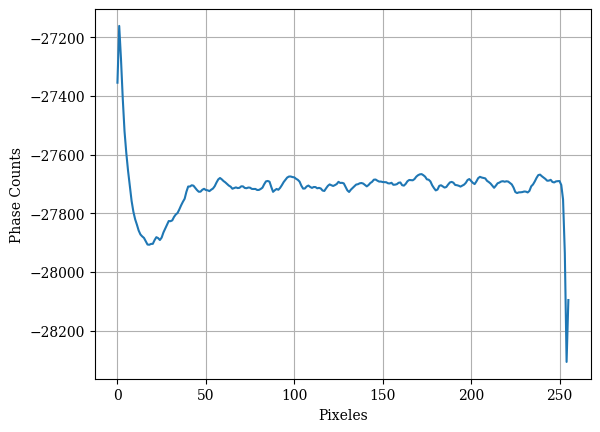

In [ ]:
mean2 = PI(Phase32)
plt.plot(mean2)
plt.grid()
plt.xlabel("Pixeles")
plt.ylabel("Phase Counts")

In [ ]:
def CNR2(Sam_mean,BKG_mean,Sigma_B):
    return abs(Sam_mean - BKG_mean)/Sigma_B


BKG1 = np.real(Phase32)[:,82:92]
BKG2 = np.real(Phase32)[:,164:174]
BKG = np.concatenate((BKG1,BKG2), axis = 1)
BKG_mean = np.mean(BKG)
Sigma_B = np.std(BKG)

Sam_mean = np.mean(Sam1)
CNRC = CNR2(Sam_mean,BKG_mean,Sigma_B)
CNRC

NameError: name 'Sam1' is not defined

# The Ulherr Method (UM)

In [ ]:
#We first need to apply the general Paganin Method to the whole image
PaganinD = (1/(distance*(delta/mu)*(kx**2 + ky**2) + 1)) #Paganin discreto
traceD = np.multiply(np.divide(-1, mu), np.log(np.fft.ifft2(np.multiply(PaganinD, np.fft.fft2(Corr)))))

#We define the new variables for the selected area
mu_B = 0.444945607176468 * 100
delta_B = 3.0595E-7

#Then we need to chose a section of the image tu cancel out the original Paganin Filter and use the new filer
section = traceD[:, 129:257]
not_mod = traceD[:, 0:129]

kx_sec = kx[:, 129:257]
ky_sec = ky[:, 129:257]

Ulherr = ((distance*(delta/mu)*(kx_sec**2 + ky_sec**2) + 1))/((distance*(delta_B/mu_B)*(kx_sec**2 + ky_sec**2) + 1))
traceD3p = np.multiply(np.divide(-1, mu_B), np.log(np.fft.ifft2(np.multiply(Ulherr, np.fft.fft2(section)))))

Ulherr = np.hstack((not_mod, -1* traceD3p))

plt.figure()
plt.title('Trace')
plt.imshow(np.real(Ulherr), cmap='bone', interpolation='none')
plt.colorbar()

Phase33 = -k*delta*Ulherr#Discreto
plt.figure()
plt.title('Phase - Effective Energy (17 keV) for Air - GPM')
plt.imshow(np.real(Phase33), cmap='bone', interpolation='none')
plt.colorbar()
np.real(Phase33)
plt.show()

asl = PI(Ulherr)
plt.plot(asl[0:129])
plt.grid()
plt.xlabel("Pixeles")
plt.ylabel("Phase Counts")
plt.show()

B1 = (np.mean((np.real(asl[120:129]))))
B2 = np.mean((np.real(asl[136:145])))

print(B1)
print(B2)

gamma = B2/B1

traceD3 = np.hstack((gamma*not_mod, -1* traceD3p))

plt.figure()
plt.title('Trace')
plt.imshow(np.real(traceD3), cmap='bone', interpolation='none')
plt.colorbar()

Phase33 = -k*delta*traceD3#Discreto
plt.figure()
plt.title('Phase - Effective Energy (17 keV) for Air - GPM')
plt.imshow(np.real(Phase33), cmap='bone', interpolation='none')
plt.colorbar()
np.real(Phase33)
plt.show()


# Intensity Profiles

In [ ]:
PM = PI(Phase3)
PBM = PI(Phase32)
UM = PI(Phase33)

plt.plot(PM)
plt.grid()
plt.xlabel("Pixeles")
plt.ylabel("Phase Counts")
plt.legend()
plt.title("Perfil de Intensidad - GPM")
plt.show()

# CNR

In [ ]:
def PI2(name):
    P=np.zeros(256)
    for i in range(len(name)):
        P=P+name[i,:]
    mean=P/len(name)
    return mean
def PI(name,inicial,final,h,y):
    P=np.zeros(y-h)
    for i in range(inicial,final):
        P=P+name[i,h:y]
    mean=P/(final-inicial)
    return mean

def func(x, A, n, m, b):
    k = A*erf((x-n)/(np.sqrt(2)*b))+m
    return k
def derfunc(x, A, n, b):
    k=A*np.sqrt(2/np.pi)*np.exp(-(x-n)**2/(2*b**2))/b
    return k
def func2(x,A,B):
    y = A/x + B
    return y
def exponential(x,a,b):
    y = a*np.exp(-x * b)
    return y
def CNR2(Sam_mean,BKG_mean,Sigma_B):
    return abs(Sam_mean - BKG_mean)/Sigma_B

In [ ]:
def CNR2(Sam_mean,BKG_mean,Sigma_B):
    return abs(Sam_mean - BKG_mean)/Sigma_B


BKG1 = np.real(Phase3)[:,50:80]
BKG2 = np.real(Phase3)[:,170:200]
BKG = np.concatenate((BKG1,BKG2), axis = 1)
BKG_mean = np.mean(BKG)
Sigma_B = np.std(BKG)

Sam = np.real(Phase3)[:,110:140]
Sam_mean = np.mean(Sam)
CNRC = CNR2(Sam_mean,BKG_mean,Sigma_B)
CNRC